In [5]:
%run myimport.py



import Image numpy->np matplotlib->plt pandas->pd tushare->ts base64 pytesseract->pt success!


In [6]:
names1880=pd.read_csv('/root/pydata-book-2nd-edition/datasets/babynames/yob1880.txt', names=['name','sex','births'])
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
years = range(1880,2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/root/pydata-book-2nd-edition/datasets/babynames/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)


In [8]:
names.groupby('sex').births.sum()

sex
F    159990140
M    162412587
Name: births, dtype: int64

In [32]:
pd.pivot_table??


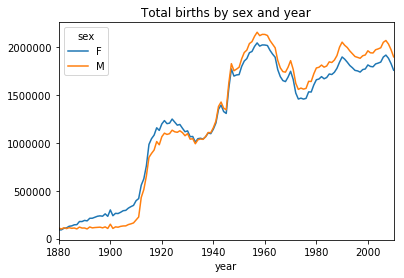

In [9]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()
total_births.plot(title='Total births by sex and year')
plt.show()

In [10]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [11]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [89]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

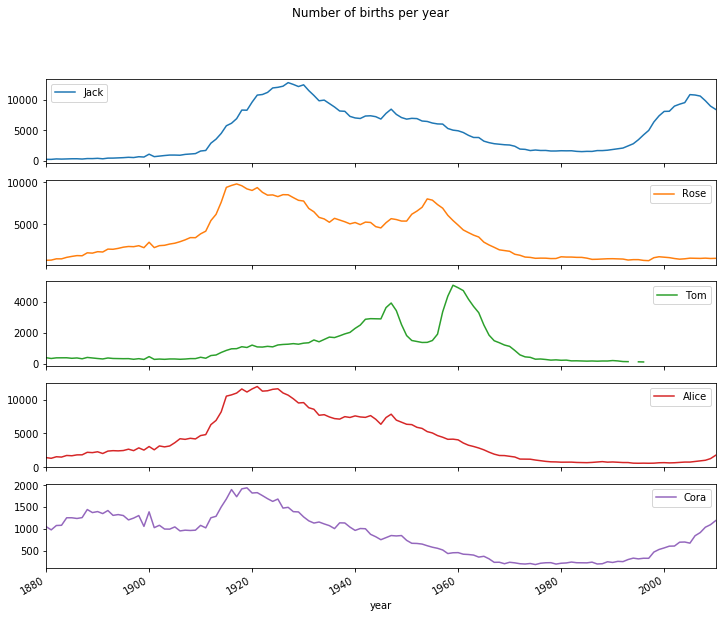

In [90]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
subset = total_births[['Jack', 'Rose','Tom','Alice','Cora']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')
plt.show()


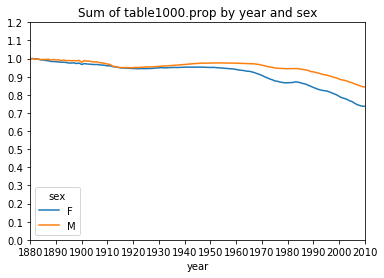

In [91]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
plt.show()

In [92]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)


/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


array([116])

In [93]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


array([25])

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


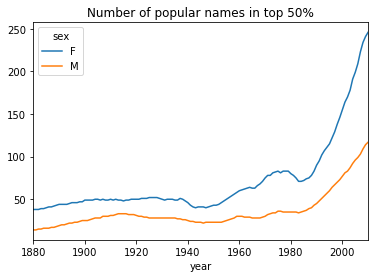

In [103]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity['F'] = map(int, diversity['F'])
diversity['M'] = map(int, diversity['M'])
#diversity.head()
diversity.plot(title="Number of popular names in top 50%")
plt.show()

In [106]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)


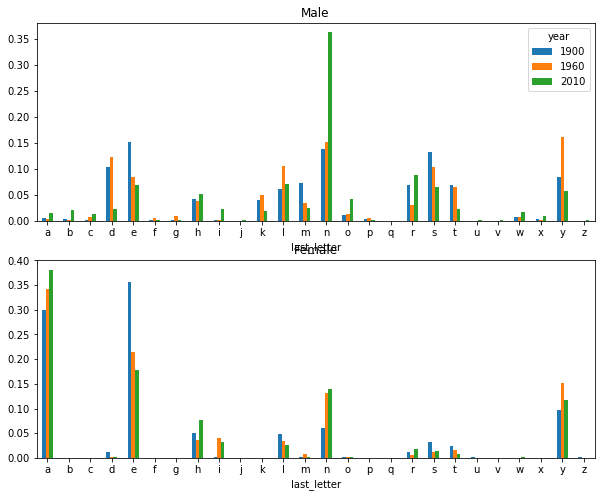

In [113]:

subtable = table.reindex(columns=[1900, 1960, 2010], level='year')
subtable.head()
subtable.sum()
letter_prop = subtable / subtable.sum().astype(float)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)
plt.show()

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


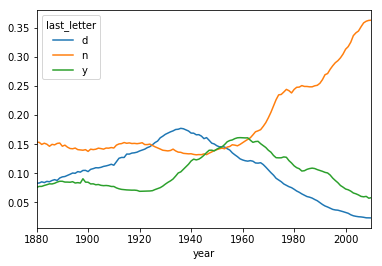

In [118]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
#dny_ts = letter_prop.ix[['a', 'e', 'n', 'y'], 'F'].T

#dny_ts.head()
dny_ts.plot()
plt.show()

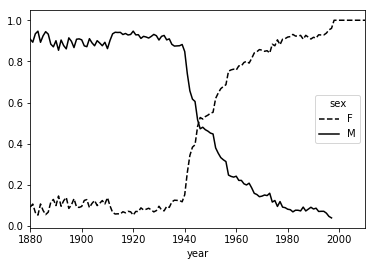

In [122]:
#boys changes girls name trend example.
all_names = top1000.name.unique()
mask =np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
#lesley_like
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()
table.plot(style={'M':'k-', 'F':'k--'})
plt.show()